In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np
import tensorflow as tf
import keras
from sklearn.model_selection import KFold

# Carregando base de dados  pré-processada

In [2]:
dataset = pd.read_csv("../../Database/dataBaseWithNER.csv")
dataset = dataset.drop(columns=["Unnamed: 0"])
dataset = dataset.dropna()
targets = np.array(dataset["target"].array)

dataset

,email,target
0,start date hourahead timee cardinall hou...,0
1,service long desk price structure deal quote ...,0
2,start date cardinall hourahead timee card...,0
3,start date hourahead timee cardinall anc...,0
4,cardinall deliverable revenue management marke...,0
...,...,...
33340,bio matrix scientific group symbo bmxg p...,1
33341,cardinall step away hot naked webcam girl liv...,1
33342,need pill increase performance click seroius ...,1
33343,datee final nom inlet hpl eastrans car...,0


In [3]:
emailsText = []
for email in dataset["email"]:
    emailsText.append(email)

del dataset

In [4]:
print(len(emailsText))

33341


# Representação vetorial TFIDF

In [5]:
tfidfVectorizer = TfidfVectorizer(analyzer="word",max_features=2100)

tfidfTransform = tfidfVectorizer.fit_transform(emailsText)

print(tfidfTransform)

  (0, 1593)	0.26470874972054786
  (0, 1098)	0.35510965844285625
  (0, 671)	0.34195431682743727
  (0, 535)	0.3142974755284843
  (0, 1663)	0.2523502664970415
  (0, 249)	0.0882891907360702
  (0, 1904)	0.14585506953003874
  (0, 861)	0.6284245513555586
  (0, 440)	0.21615559903629922
  (0, 1796)	0.23177737406989862
  (1, 1893)	0.12322552160237797
  (1, 432)	0.16667910623163265
  (1, 1405)	0.2023515027069684
  (1, 1910)	0.21821281232441633
  (1, 773)	0.252147976524646
  (1, 1814)	0.24651126769711865
  (1, 2073)	0.1442701571707954
  (1, 1342)	0.19540664510107641
  (1, 1962)	0.21745283397516152
  (1, 809)	0.3089620245082559
  (1, 1457)	0.1585651873255142
  (1, 297)	0.26945510026530634
  (1, 1102)	0.268483606738479
  (1, 105)	0.2304674552193428
  (1, 1514)	0.2375975711797802
  :	:
  (33340, 734)	0.1499328111246709
  (33340, 1274)	0.08454655116352783
  (33340, 1509)	0.09899129231263658
  (33340, 637)	0.15067486614547307
  (33340, 1426)	0.1353816153153684
  (33340, 1339)	0.22427638740937866
  (333

In [6]:
tfidfLabels = tfidfVectorizer.get_feature_names()
tfidfLabels

['aa',
 'ability',
 'able',
 'absolutely',
 'abuse',
 'accept',
 'acceptance',
 'accepted',
 'access',
 'according',
 'account',
 'accounting',
 'accuracy',
 'achieve',
 'acquire',
 'acquired',
 'acquisition',
 'acrobat',
 'act',
 'action',
 'active',
 'activity',
 'actual',
 'actually',
 'acy',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'administration',
 'adobe',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'advertisement',
 'advertising',
 'advice',
 'advise',
 'advised',
 'advises',
 'advisor',
 'aep',
 'affair',
 'affect',
 'affiliate',
 'affiliated',
 'affordable',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggressive',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'aid',
 'ail',
 'aimee',
 'air',
 'al',
 'alert',
 'alias',
 'align',
 'allen',
 'allocated',
 'allocation',
 'allow',
 'allowed',
 'allows',
 'alternative',
 'america',
 'amid',
 'amount',
 'amy',
 'analysis',
 'analyst',
 'ancillary',
 'andmanyother',
 'andrew',


In [7]:
dfTfidf = pd.DataFrame(data=tfidfTransform.toarray(), columns=tfidfLabels)
dfTfidf

In [8]:
tfidfData = np.array(dfTfidf)
tfidfData

,aa,ability,able,absolutely,abuse,accept,acceptance,accepted,access,according,...,xanax,xl,xp,yahoo,year,yes,yield,yo,young,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.143700,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33336,0.0,0.0,0.0,0.0,0.0,0.0,0.015667,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.013857,0.0,0.0,0.0,0.0,0.0,0.0
33337,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.207355,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
33338,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
33339,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Visualização de dados com TSNE

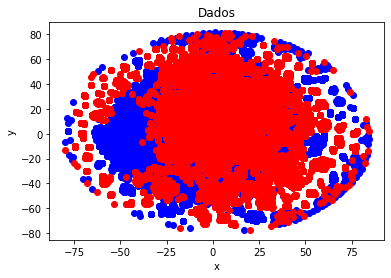

In [9]:
# model = TSNE(n_components=2, random_state=0)
# array_red = model.fit_transform(dfTfidf)

# df_tsne = pd.DataFrame(array_red)

# df_tsne['Target'] = target
# df_tsne_c1 = df_tsne[df_tsne['Target'] == 0]

# df_tsne_c2 = df_tsne[df_tsne['Target'] == 1]

# plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')

# plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')

# plt.title('Dados')
# plt.xlabel('x')
# plt.ylabel('y')

# plt.show()

# Validação

In [ ]:
tfidfData = np.array(tfidfData)

tfidfData = tfidfData.reshape((tfidfData.shape[0],1,tfidfData.shape[1]))
print(tfidfData.shape)

In [ ]:
foldsAccuracy = []
foldLosses = []

In [ ]:
kfold = KFold(n_splits=4, shuffle=True)

In [ ]:
foldCount = 1
for train, test in kfold.split(tfidfData, targets):
    model = keras.models.Sequential([
        #keras.layers.Conv1D(1000, kernel_size=1, activation="relu",input_shape=tfidfData.shape[1:]),
        keras.layers.Conv1D(640, kernel_size=1, activation="relu",input_shape=tfidfData.shape[1:]),
        keras.layers.MaxPooling1D(pool_size=1),
        keras.layers.Flatten(),
        #keras.layers.Dense(5000, activation="relu"),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(len(set(targets)), activation="softmax")
    ])

    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

    print('****************************************************')
    print(f'Iniciando treinamento da fold: {foldCount}.')

    callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4,mode='min'), tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, restore_best_weights=True)]

    history = model.fit(tfidfData[train], targets[train], epochs=200, callbacks=callbacks, validation_split=0.05)

    scores = model.evaluate(tfidfData[test], targets[test], verbose=0)
    print(f'Score fold {foldCount}: {model.metrics_names[0]} de {scores[0]}; {model.metrics_names[1]} de {scores[1]*100}%')

    foldsAccuracy.append(scores[1] * 100)
    foldLosses.append(scores[0])

    foldCount = foldCount + 1

****************************************************
Iniciando treinamento da fold: 1.
Epoch 1/200
743/743 [==============================] - 4s 3ms/step - loss: 0.3499 - accuracy: 0.8889 - val_loss: 0.1727 - val_accuracy: 0.9440 - lr: 0.0100
Epoch 2/200
743/743 [==============================] - 2s 2ms/step - loss: 0.2207 - accuracy: 0.9410 - val_loss: 0.1448 - val_accuracy: 0.9528 - lr: 0.0100
Epoch 3/200
743/743 [==============================] - 2s 2ms/step - loss: 0.1933 - accuracy: 0.9501 - val_loss: 0.1184 - val_accuracy: 0.9600 - lr: 0.0100
Epoch 4/200
743/743 [==============================] - 2s 2ms/step - loss: 0.1385 - accuracy: 0.9627 - val_loss: 0.0856 - val_accuracy: 0.9712 - lr: 0.0100
Epoch 5/200
743/743 [==============================] - 2s 2ms/step - loss: 0.1287 - accuracy: 0.9648 - val_loss: 0.1275 - val_accuracy: 0.9576 - lr: 0.0100
Epoch 6/200
743/743 [==============================] - 2s 2ms/step - loss: 0.0776 - accuracy: 0.9768 - val_loss: 0.0639 - val_accurac

In [ ]:
print('****************************************************')
print('Score de cada fold:')
for i in range(0, len(foldsAccuracy)):
    print('****************************************************')
    print(f'--> Fold {i+1}: Loss: {foldLosses[i]} ; Accuracy: {foldsAccuracy[i]}%')

print('****************************************************')
print('Média de accuracy das folds:')
print(f'--> Accuracy: {np.mean(foldsAccuracy)} (+- {np.std(foldsAccuracy)})')
print(f'--> Loss: {np.mean(foldLosses)}')
print('****************************************************')